In [23]:
import xarray as xr

In [24]:
import src.plots.vertical_profile as profile_plots
import src.plots.PDF as pdf_plots
import src.extreme.period_pattern_extreme as extreme

In [25]:
import importlib
importlib.reload(profile_plots)

<module 'src.plots.vertical_profile' from '/work/mh0033/m300883/3rdPanel/src/plots/vertical_profile.py'>

# Functions

In [26]:
def read_index(pattern):
    """read index different_patterns"""
    odir = '/work/mh0033/m300883/3rdPanel/data/allPattern/dep/'+pattern+'_pattern/'
    fpath = odir+'all_'+pattern+'_nonstd.nc'
    all_index = xr.open_dataset(fpath)
    return all_index.pc

In [27]:
def standardize(index,dim = ('time','ens')):
    """
    standardardize with the mean and std of 'time' and 'ens'.
    """
    mean = index.mean(dim = dim)
    std = index.std(dim = dim)
    index = (index-mean)/std
    return index

read data

In [28]:
all_all = read_index("all")

# All pattern - stadnard with *period* mean and std

In [16]:
all_all

<xarray.DataArray 'pc' (hlayers: 11, mode: 2, ens: 100, time: 149)>
[327800 values with dtype=float64]
Coordinates:
  * hlayers  (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * mode     (mode) object 'NAO' 'EA'
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * time     (time) object 1851-03-16 11:52:00 ... 1999-03-16 11:52:00

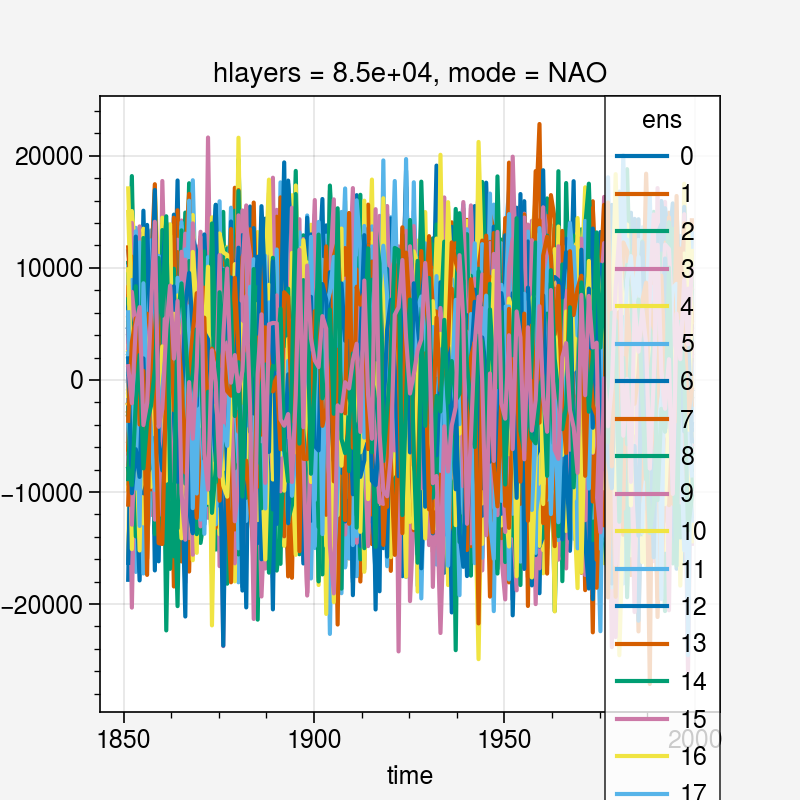

In [20]:
all_all.sel(mode = 'NAO',hlayers = 85000).plot.line(x = 'time', hue = 'ens')

## periods

select

In [7]:
first10_all = all_all.isel(time = slice(0,10))
last10_all = all_all.isel(time = slice(-10,all_all.time.size))

standardize with own mean and std

In [8]:
first10_all_period = standardize(first10_all)
last10_all_period = standardize(last10_all)

## PDF

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


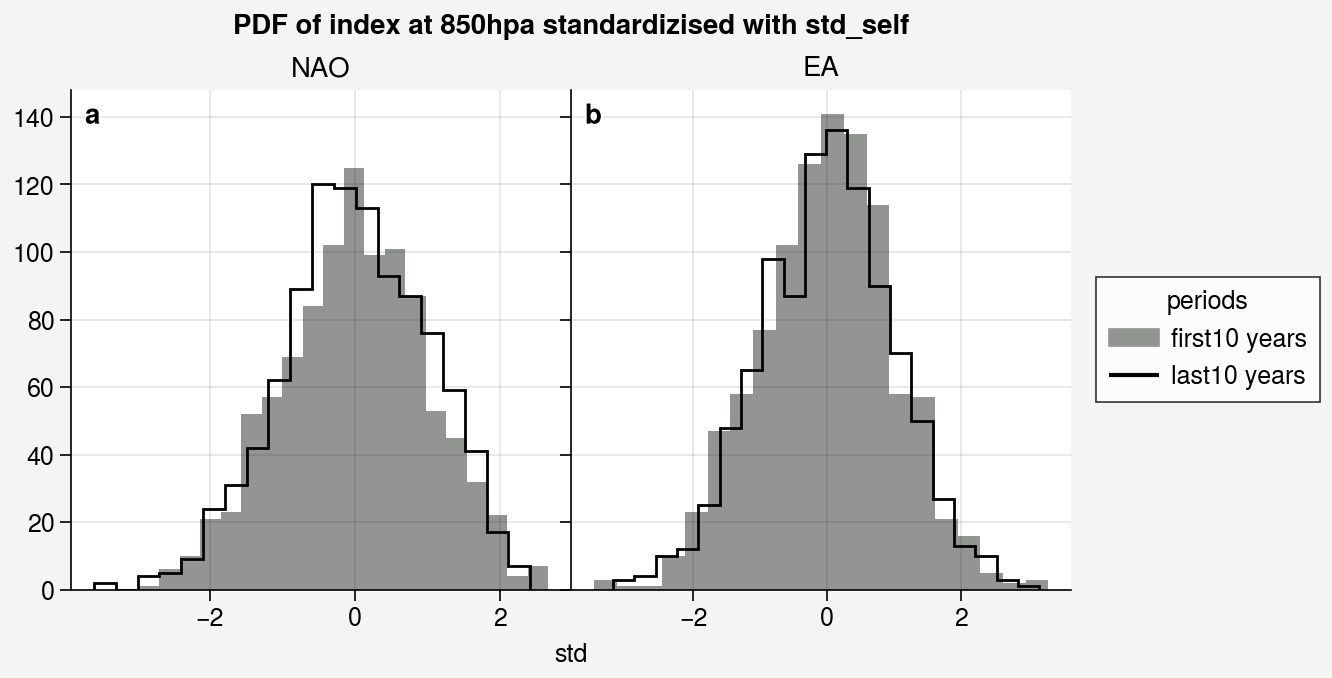

In [9]:
pdf_plots.plot_hist(first10_all_period,last10_all_period,'std_self',hlayers = 85000,bins = 20)

In [13]:
first10_all_period.sel(hlayers = 85000,mode = 'NAO').mean()

<xarray.DataArray 'pc' ()>
array(-1.42108547e-17)
Coordinates:
    hlayers  float64 8.5e+04
    mode     <U3 'NAO'

In [14]:
last10_all_period.sel(hlayers = 85000,mode = 'NAO').mean()

<xarray.DataArray 'pc' ()>
array(2.84217094e-17)
Coordinates:
    hlayers  float64 8.5e+04
    mode     <U3 'NAO'

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


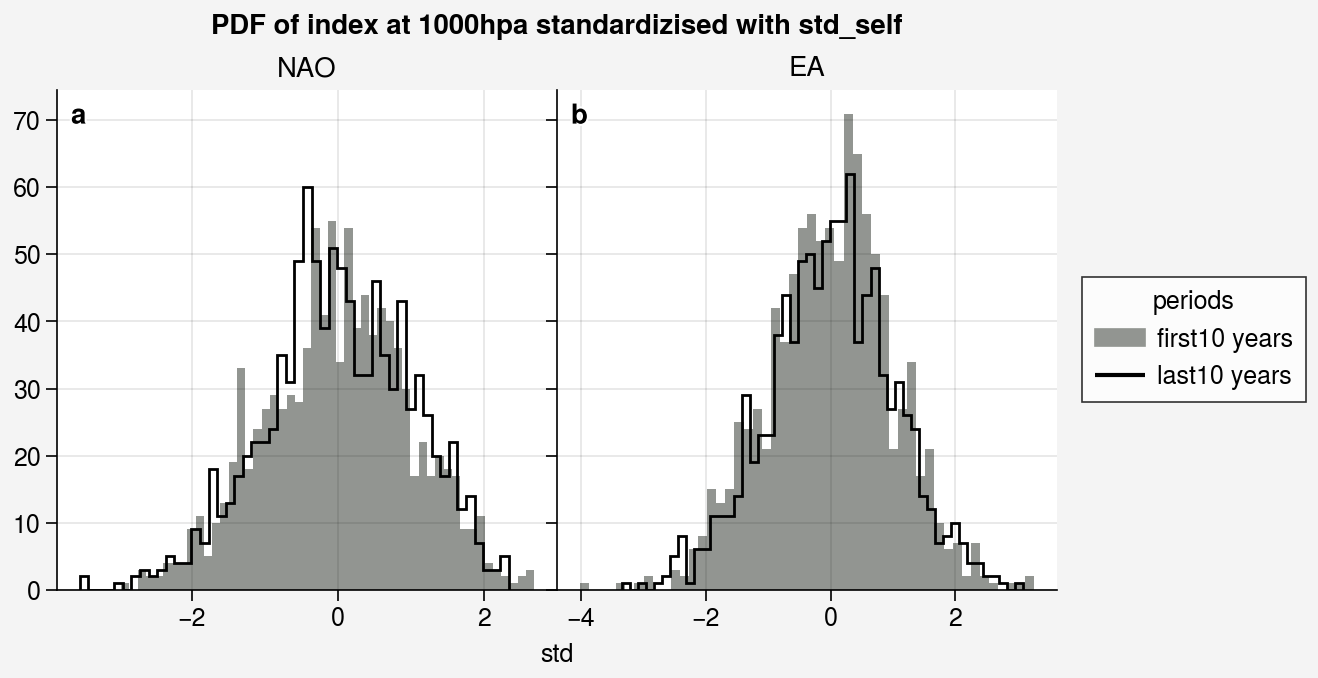

In [12]:
pdf_plots.plot_hist(first10_all_period,last10_all_period,'std_self',hlayers = 100000,bins = 50)


## Extreme count

In [44]:
first10_all_period_ec = extreme.period_extreme_count(first10_all_period)
last10_all_period_ec = extreme.period_extreme_count(last10_all_period)

## Profile

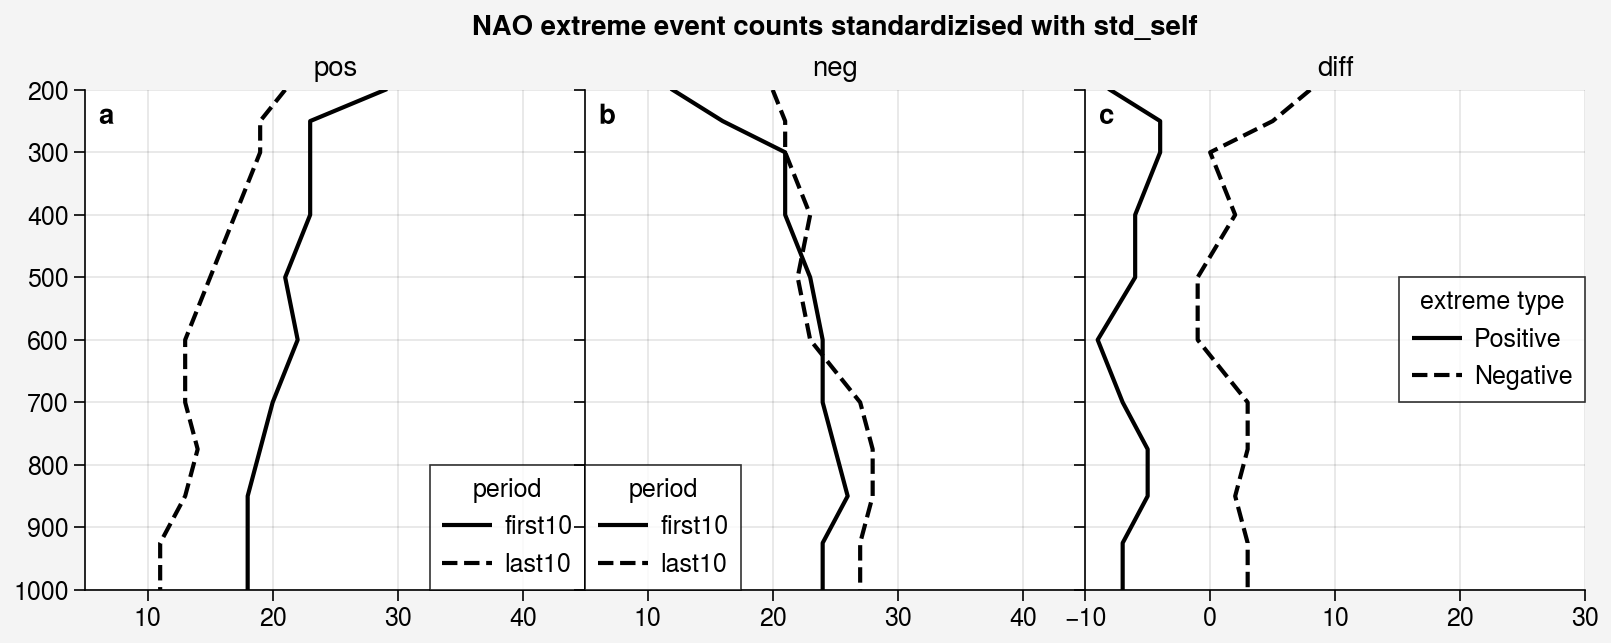

In [45]:
profile_plots.plot_vertical_profile(first10_all_period_ec,last10_all_period_ec,mode = 'NAO',std_type='std_self')

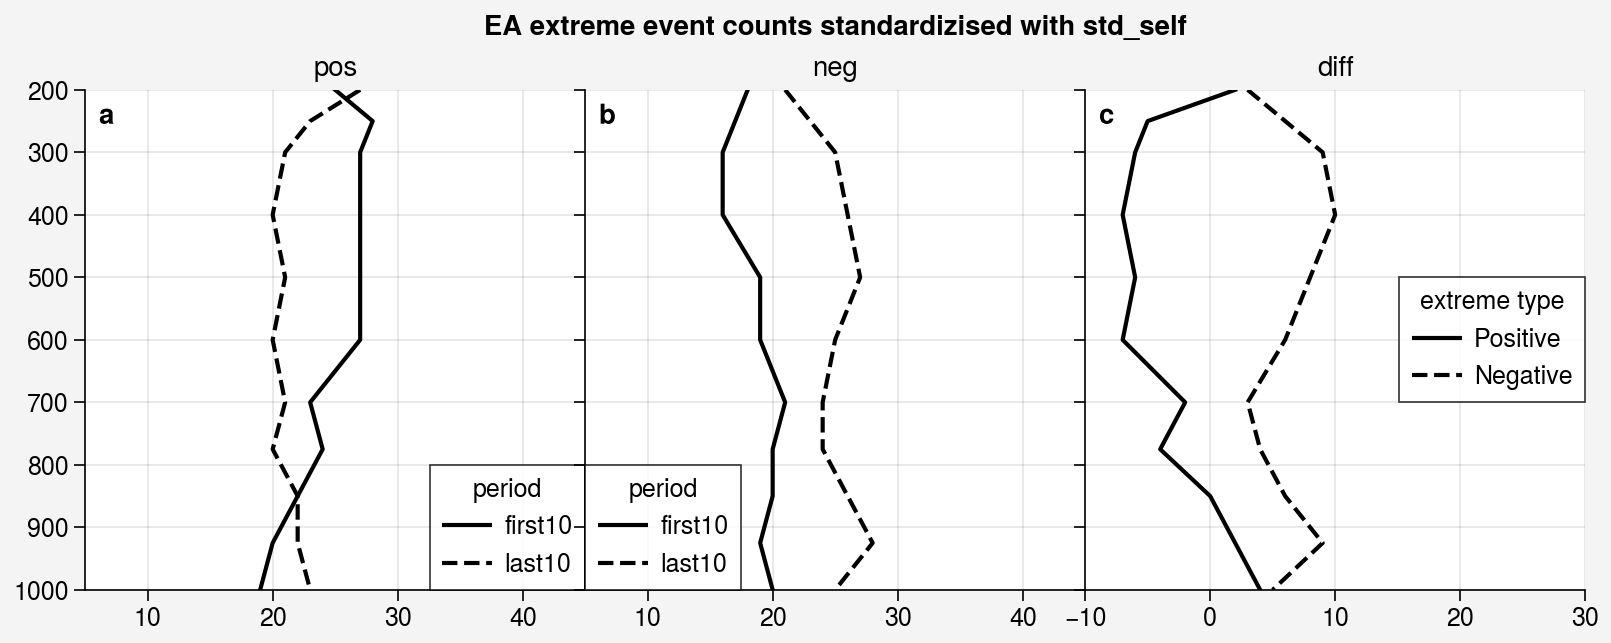

In [46]:
profile_plots.plot_vertical_profile(first10_all_period_ec,last10_all_period_ec,mode = 'EA',std_type='std_self')

# All pattern - stadnard with *whole* mean and std

In [29]:
all_all_whole = standardize(all_all)

In [30]:
first10_all_whole = all_all_whole.isel(time = slice(0,10))
last10_all_whole = all_all_whole.isel(time = slice(-10,all_all.time.size))

## PDF

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


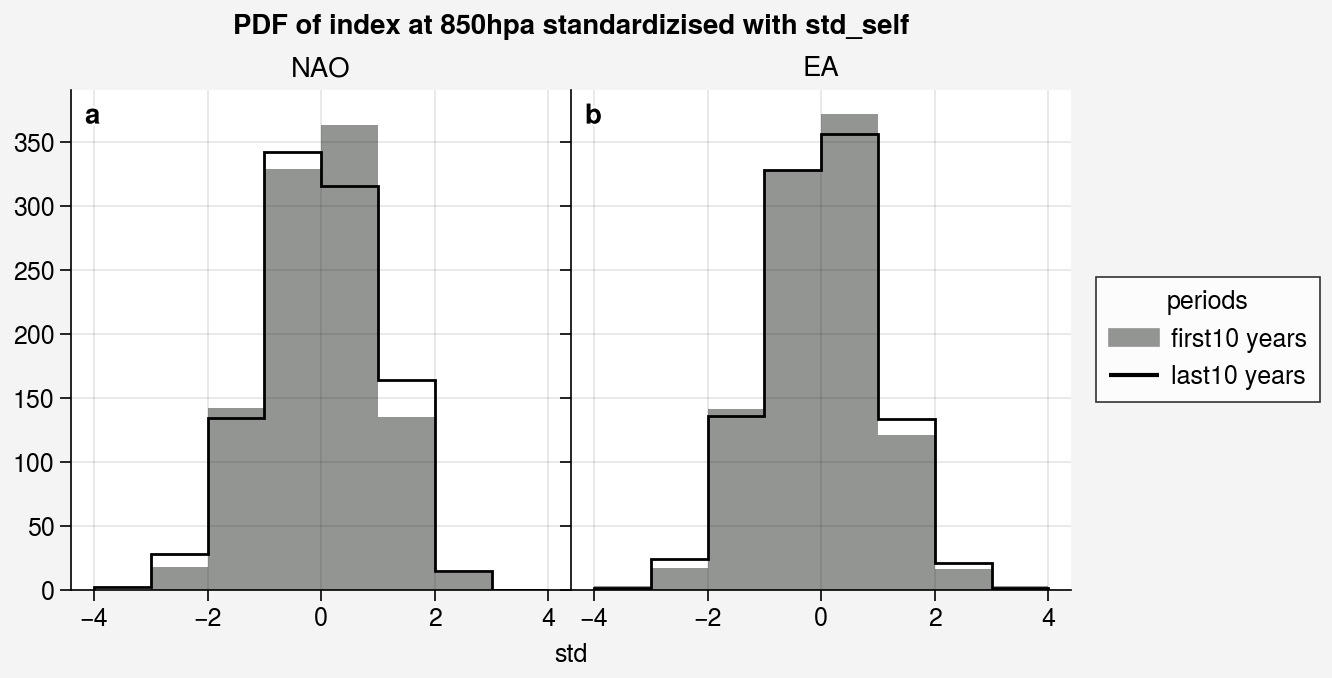

In [36]:
pdf_plots.plot_hist(first10_all_whole,last10_all_whole,'std_self',hlayers = 85000)

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


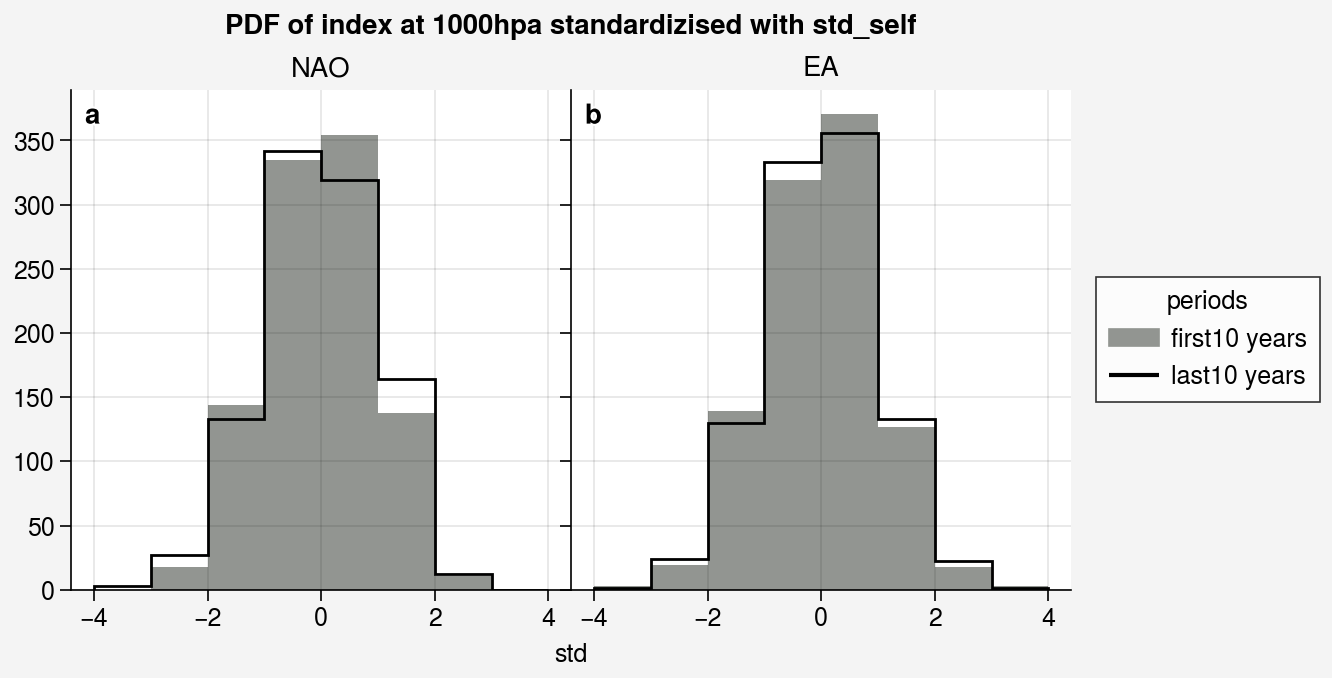

In [37]:
pdf_plots.plot_hist(first10_all_whole,last10_all_whole,'std_self',hlayers = 100000)


## Extreme count

In [33]:
first10_all_whole_ec = extreme.period_extreme_count(first10_all_whole)
last10_all_whole_ec = extreme.period_extreme_count(last10_all_whole)

## Profile

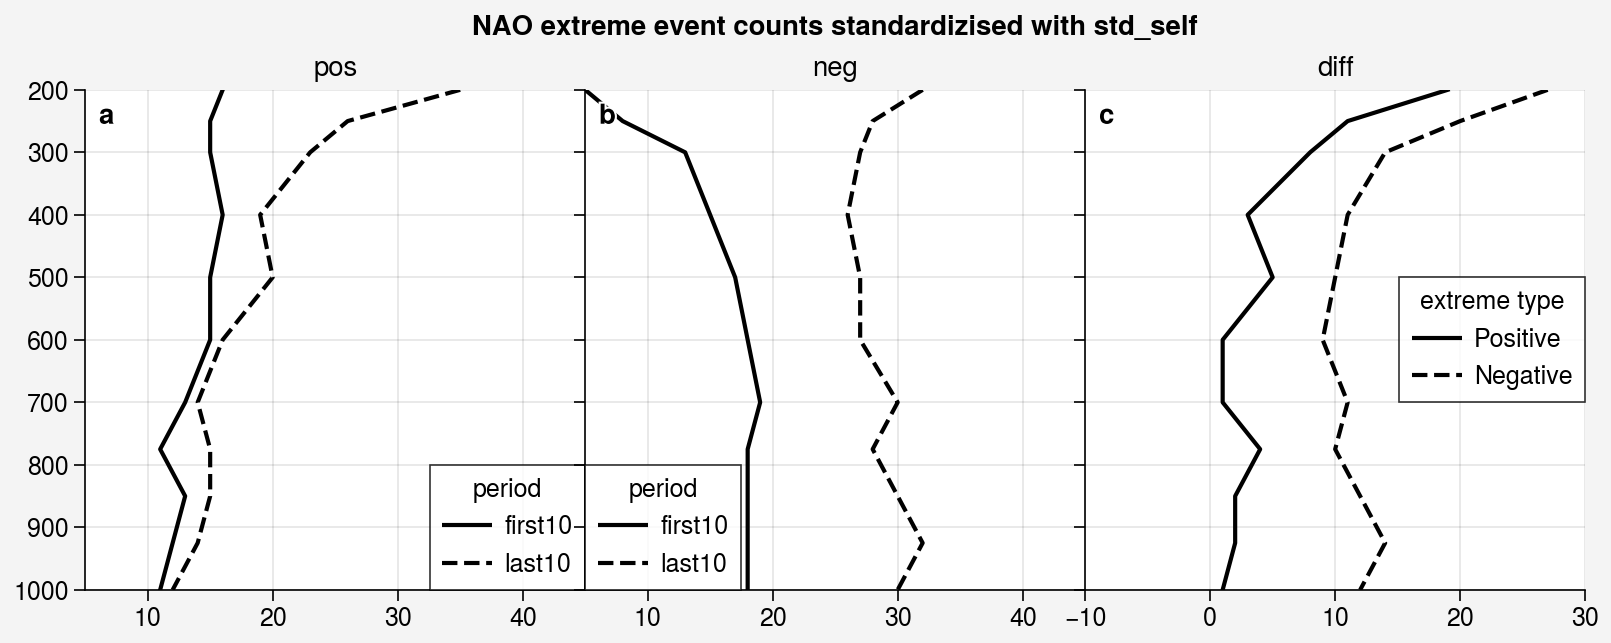

In [42]:
profile_plots.plot_vertical_profile(first10_all_whole_ec,last10_all_whole_ec,mode = 'NAO',std_type='std_self')

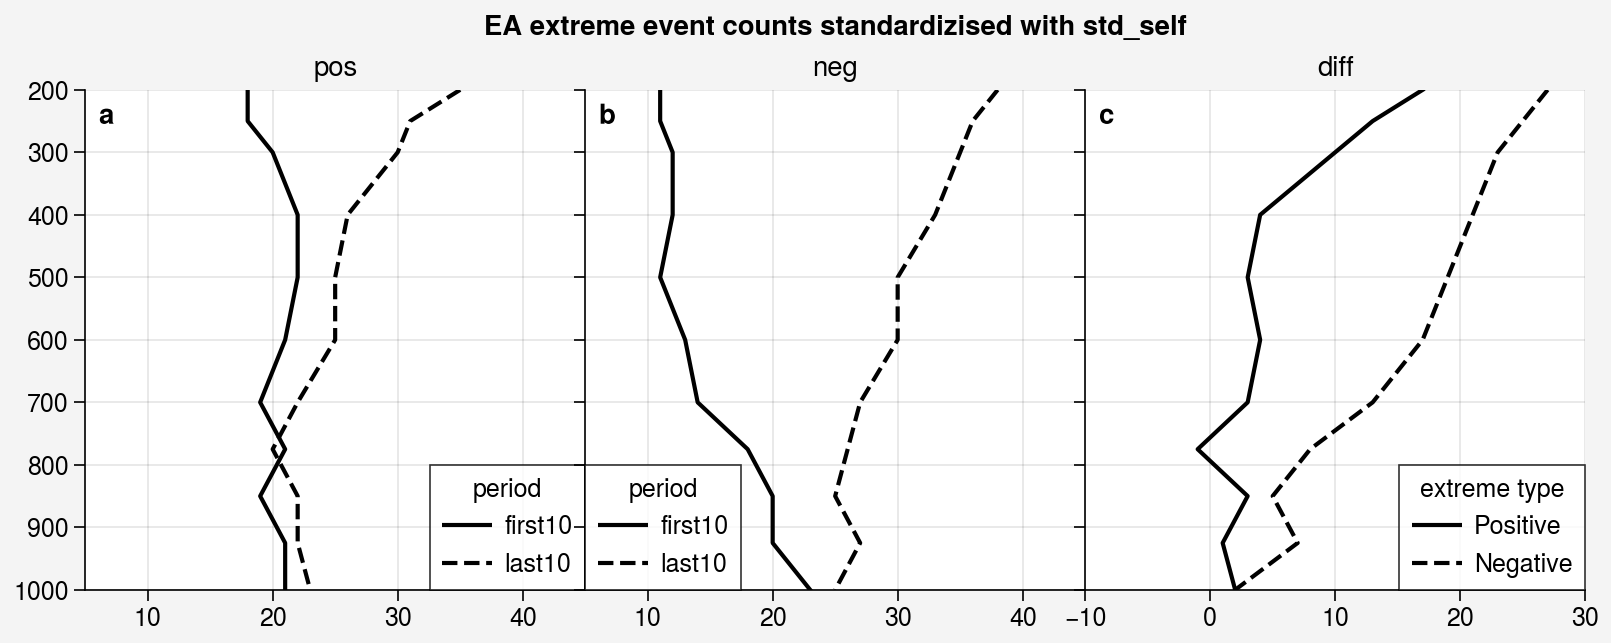

In [34]:
profile_plots.plot_vertical_profile(first10_all_whole_ec,last10_all_whole_ec,mode = 'EA',std_type='std_self')